Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


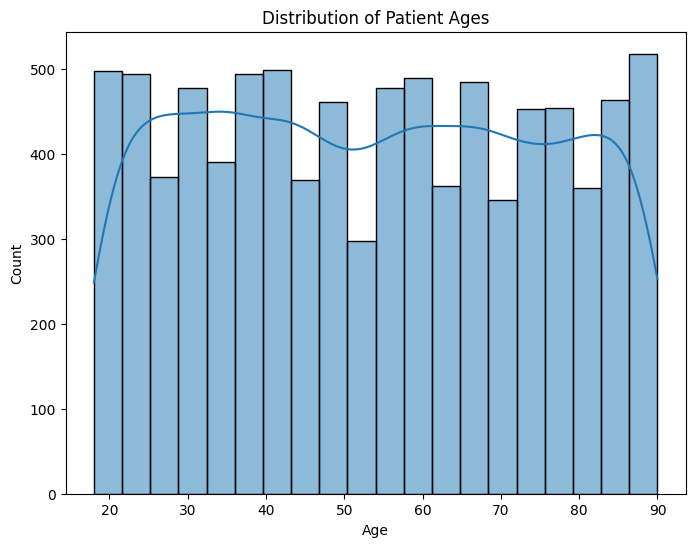

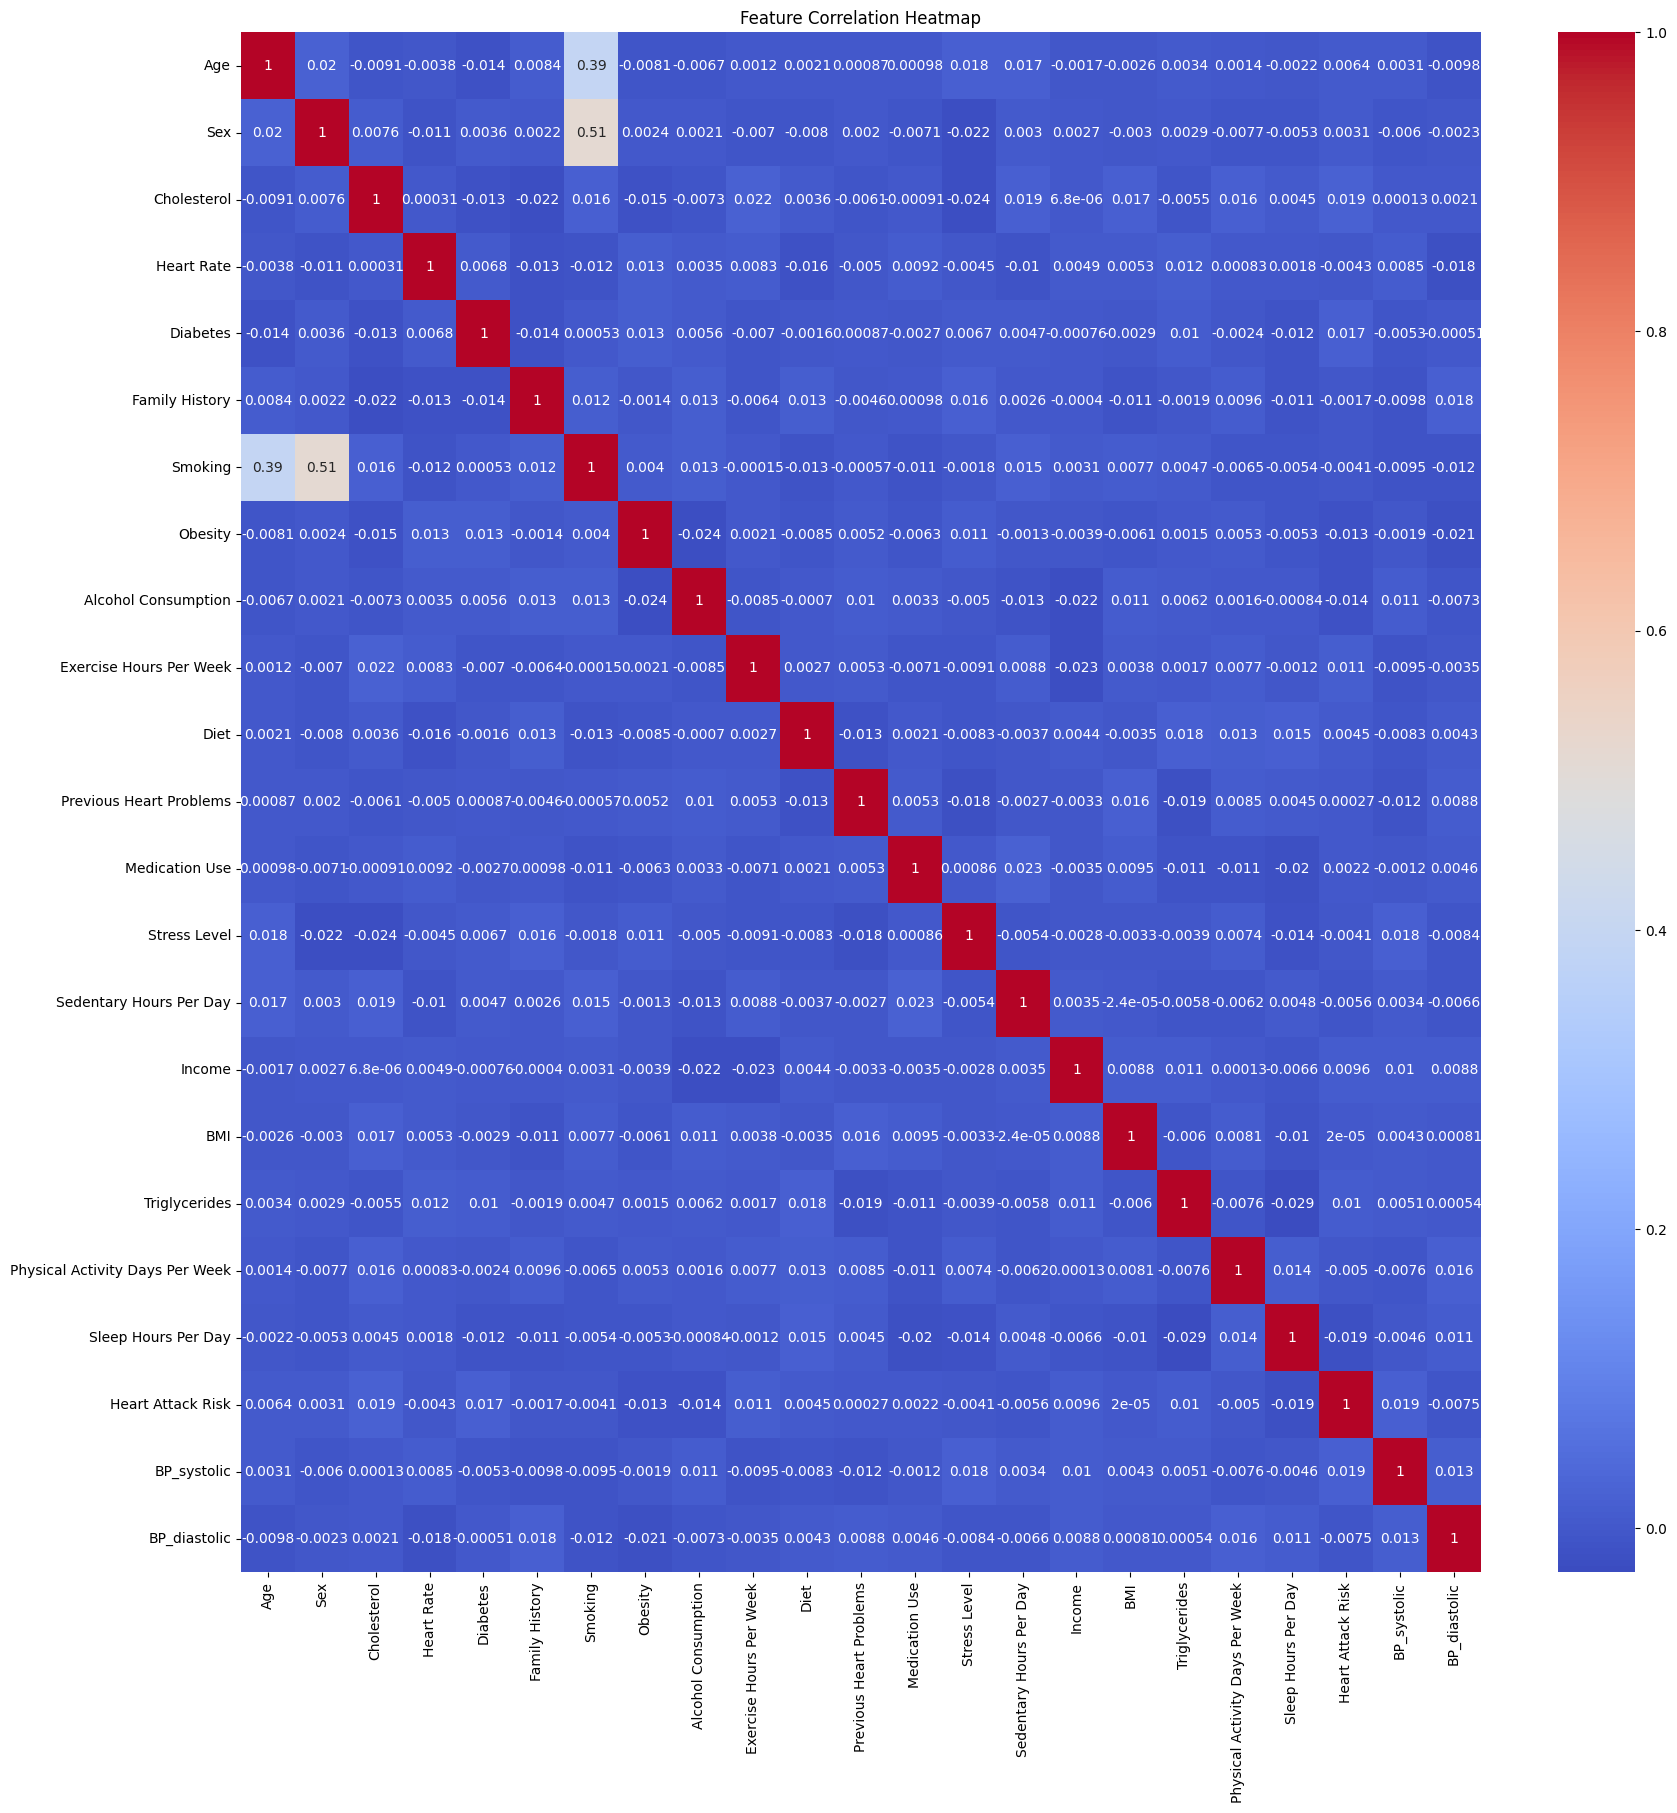

Decision Tree Accuracy: 0.5773168103448276


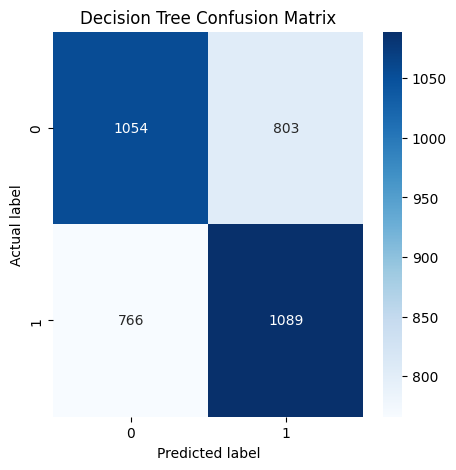

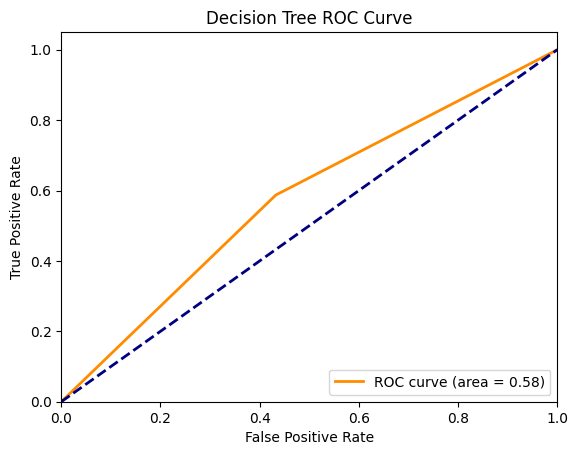

Logistic Regression Accuracy: 0.6077586206896551


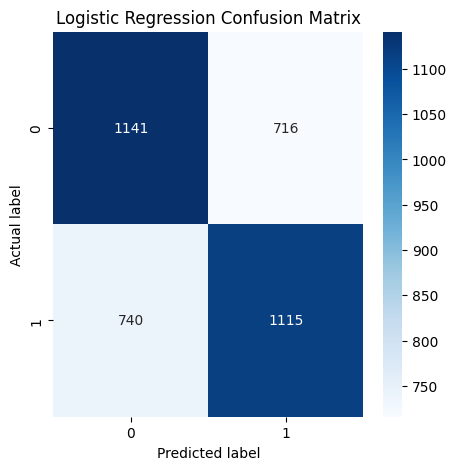

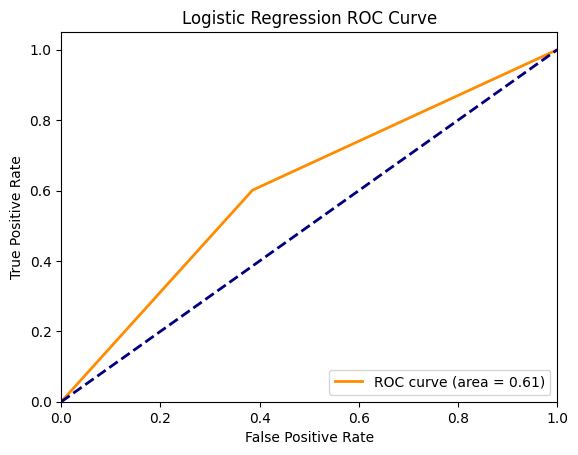

Naive Bayes Accuracy: 0.6352370689655172


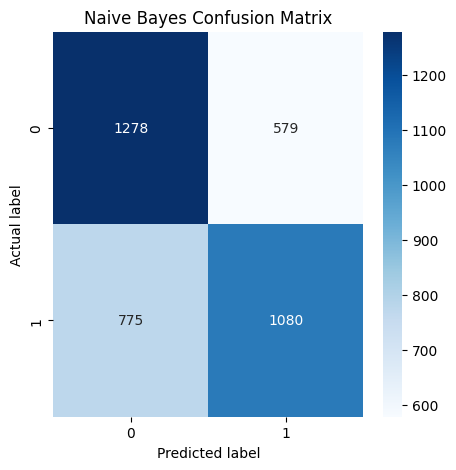

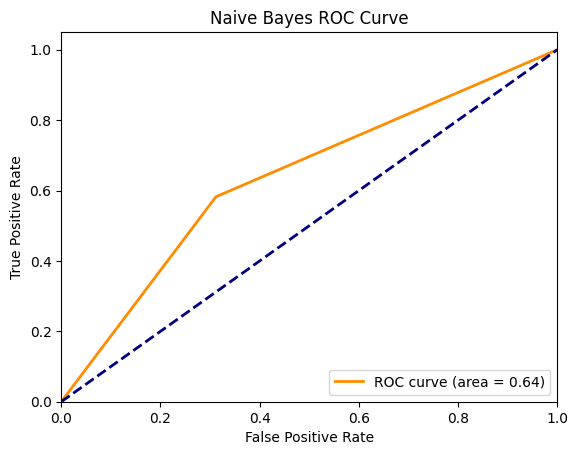

Random Forest Accuracy: 0.6664870689655172


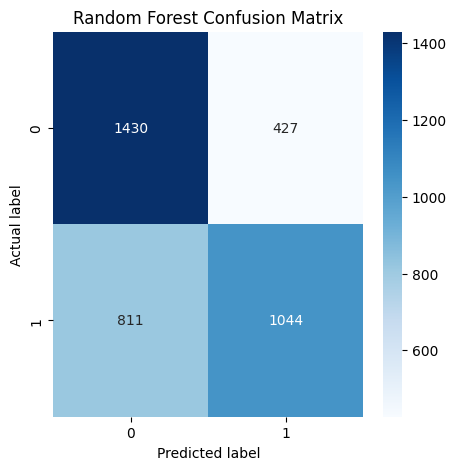

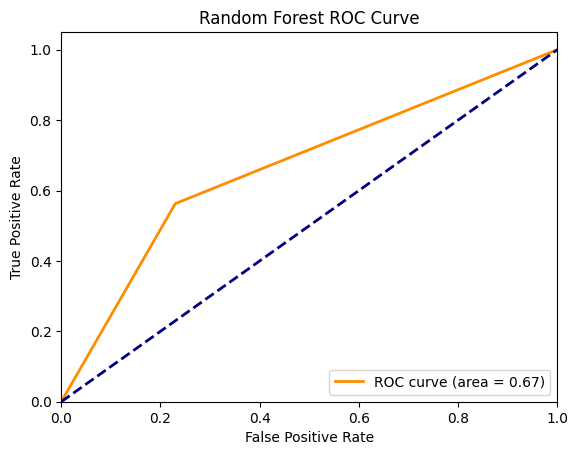

Model: DecisionTreeClassifier, Cross-Val Scores: [0.50533333 0.52044444 0.54933333 0.64562028 0.65762561], Average Score: 0.5756713996344054
Model: LogisticRegression, Cross-Val Scores: [0.48888889 0.50977778 0.56488889 0.74655402 0.74121832], Average Score: 0.6102655797638457
Model: GaussianNB, Cross-Val Scores: [0.49466667 0.51244444 0.56577778 0.78034682 0.78168075], Average Score: 0.6269832913393607
Epoch 1/10
236/236 [==============================] - 1s 2ms/step - loss: 0.6547 - accuracy: 0.6051
Epoch 2/10
236/236 [==============================] - 1s 2ms/step - loss: 0.6303 - accuracy: 0.6399
Epoch 3/10
236/236 [==============================] - 1s 2ms/step - loss: 0.6137 - accuracy: 0.6574
Epoch 4/10
236/236 [==============================] - 1s 2ms/step - loss: 0.5965 - accuracy: 0.6744
Epoch 5/10
236/236 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.6916
Epoch 6/10
236/236 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 

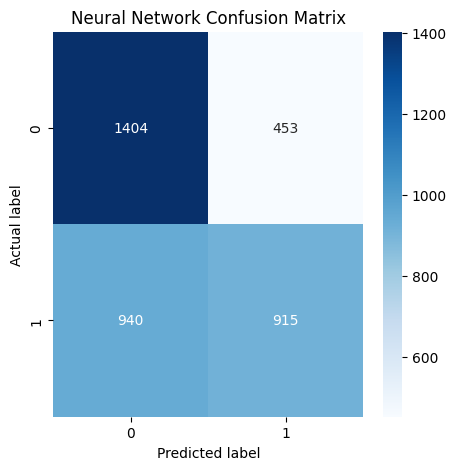

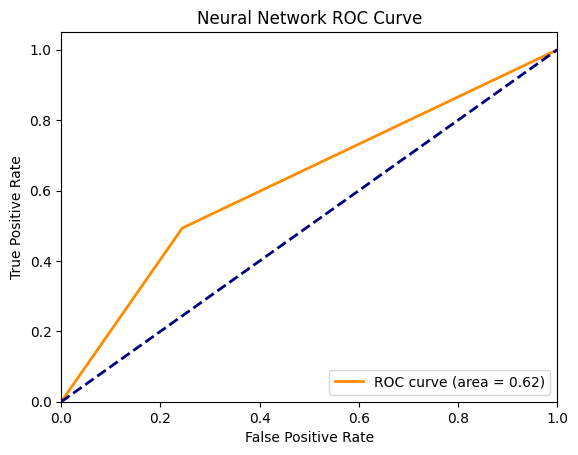

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Model: RandomForestClassifier, Cross-Val Scores: [0.528      0.53866667 0.60666667 0.8457092  0.85237884], Average Score: 0.6742842744923669
Neural Network Cross-Val Scores: [0.6231111288070679, 0.6053333282470703, 0.6422222256660461, 0.6233881711959839, 0.6207203269004822], Average Score: 0.62295503616333


In [ ]:
# Step 1: Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import json
import pickle as pkl

# Step 2: Mount Google Drive (to access the dataset)
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Machine_Learning_Project/heart_attack_prediction_dataset.csv')

# Step 4: Data Preprocessing
df = df.drop('Patient ID', axis=1)  # Assuming 'Patient ID' is not a useful feature
df['BP_systolic'] = df['Blood Pressure'].apply(lambda x: x.split("/")[0])
df['BP_diastolic'] = df['Blood Pressure'].apply(lambda x: x.split("/")[1])
df['BP_systolic'] = pd.to_numeric(df['BP_systolic'])
df['BP_diastolic'] = pd.to_numeric(df['BP_diastolic'])
df.drop(['Blood Pressure', 'Country', 'Continent', 'Hemisphere'], axis=1, inplace=True)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Diet'] = le.fit_transform(df['Diet'])

# Step 5: Exploratory Data Analysis (EDA)
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Heatmap for Feature Correlations
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 6: Feature Selection
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Step 7: Balancing the Dataset using SMOTE
smote = SMOTE(random_state=50)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 8: Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.33, random_state=42)

# Function to Plot Confusion Matrix and ROC Curve
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Step 10: Model Training and Evaluation
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
dt_cm = confusion_matrix(y_test, dt_predictions)
plot_confusion_matrix(dt_cm, "Decision Tree Confusion Matrix")
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)
dt_roc_auc = auc(dt_fpr, dt_tpr)
plot_roc_curve(dt_fpr, dt_tpr, dt_roc_auc, "Decision Tree ROC Curve")

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
lr_cm = confusion_matrix(y_test, lr_predictions)
plot_confusion_matrix(lr_cm, "Logistic Regression Confusion Matrix")
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predictions)
lr_roc_auc = auc(lr_fpr, lr_tpr)
plot_roc_curve(lr_fpr, lr_tpr, lr_roc_auc, "Logistic Regression ROC Curve")

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
nb_cm = confusion_matrix(y_test, nb_predictions)
plot_confusion_matrix(nb_cm, "Naive Bayes Confusion Matrix")
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_predictions)
nb_roc_auc = auc(nb_fpr, nb_tpr)
plot_roc_curve(nb_fpr, nb_tpr, nb_roc_auc, "Naive Bayes ROC Curve")

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=30)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
rf_roc_auc = auc(rf_fpr, rf_tpr)
plot_roc_curve(rf_fpr, rf_tpr, rf_roc_auc, "Random Forest ROC Curve")


# Step 11: Cross Validation for Model Performance
models = [dt_model, lr_model, nb_model]
for model in models:
    scores = cross_val_score(model, X_scaled, y_resampled, cv=5)
    print(f'Model: {model.__class__.__name__}, Cross-Val Scores: {scores}, Average Score: {np.mean(scores)}')

# Step 12: Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)
nn_predictions = nn_model.predict(X_test).ravel()
nn_predictions = [1 if x > 0.5 else 0 for x in nn_predictions]
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))
nn_cm = confusion_matrix(y_test, nn_predictions)
plot_confusion_matrix(nn_cm, "Neural Network Confusion Matrix")
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_predictions)
nn_roc_auc = auc(nn_fpr, nn_tpr)
plot_roc_curve(nn_fpr, nn_tpr, nn_roc_auc, "Neural Network ROC Curve")

# Step 13: Saving Models, Scaler, and Feature Names
# Step 13: Saving Models, Scaler, and Feature Names
with open('/content/drive/My Drive/dt_model.pkl', 'wb') as f:
    pkl.dump(dt_model, f)
with open('/content/drive/My Drive/lr_model.pkl', 'wb') as f:
    pkl.dump(lr_model, f)
with open('/content/drive/My Drive/nb_model.pkl', 'wb') as f:
    pkl.dump(nb_model, f)
with open('/content/drive/My Drive/rf_model.pkl', 'wb') as f:
    pkl.dump(rf_model, f)
nn_model.save('/content/drive/My Drive/nn_model.h5')
with open('/content/drive/My Drive/std_scaler.bin', 'wb') as f:
    pkl.dump(scaler, f)
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("/content/drive/My Drive/columns.json", "w") as f:
    f.write(json.dumps(columns))


!pip install plotly
import plotly.express as px
classes = df['Heart Attack Risk'].value_counts().reset_index()
classes.rename(columns={'index': 'Heart Attack Risk', 'Heart Attack Risk': 'count'}, inplace=True)
classes['percent'] = round(classes['count'] / classes['count'].sum() * 100, 2)
# Calculate the count and percentage of each class in 'Heart Attack Risk'
class_counts = df['Heart Attack Risk'].value_counts()
class_percentage = round((class_counts / class_counts.sum()) * 100, 2)
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your Random Forest model
rf_scores = cross_val_score(rf_model, X_scaled, y_resampled, cv=5)
print(f'Model: RandomForestClassifier, Cross-Val Scores: {rf_scores}, Average Score: {rf_scores.mean()}')
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

kf = KFold(n_splits=5, shuffle=True, random_state=42)
nn_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train_kf, X_test_kf = X_scaled[train_index], X_scaled[test_index]
    y_train_kf, y_test_kf = y_resampled[train_index], y_resampled[test_index]

    # Define the neural network model
    nn_model_kf = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_kf.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    nn_model_kf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    nn_model_kf.fit(X_train_kf, y_train_kf, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    score = nn_model_kf.evaluate(X_test_kf, y_test_kf, verbose=0)
    nn_scores.append(score[1])  # Assuming score[1] is accuracy

print(f'Neural Network Cross-Val Scores: {nn_scores}, Average Score: {np.mean(nn_scores)}')

# Create a DataFrame to hold the count and percentage
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage (%)': class_percentage
})

# Display the DataFrame
class_distribution

fig = px.pie(classes,
             values='percent',
             names='Heart Attack Risk',
             title='Heart Attack Risk balance by percent',
             color_discrete_sequence=px.colors.sequential.Electric,
             height=400,
             width=600
            )

fig.update_traces(marker_line_color = 'green',
                  marker_line_width = 2)

fig.show()
